In [22]:
import sklearn.datasets
# conda install -c conda-forge scikit-learn
from sklearn import neighbors, tree, cluster
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import numpy as np
import itertools as it

In [23]:
def draw_confusion_matrix(y_test, y_pred, display_labels=None):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
    disp.plot()
    plt.show()

In [24]:
def draw_scatter(data, labels, x_feature, y_feature):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=labels, alpha=0.5, s=100)
    plt.xlabel(iris.feature_names[x_feature]), plt.ylabel(iris.feature_names[y_feature])
    plt.show()

## Loading example data: Iris plants dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset

In [25]:
iris = sklearn.datasets.load_iris()

In [26]:
type(iris)

sklearn.utils.Bunch

In [28]:
iris.data.shape, iris.data[:5]

((150, 4),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [29]:
iris.target.shape, np.unique(iris.target, return_counts=True)

((150,), (array([0, 1, 2]), array([50, 50, 50])))

### Plot feature combinations + labels

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


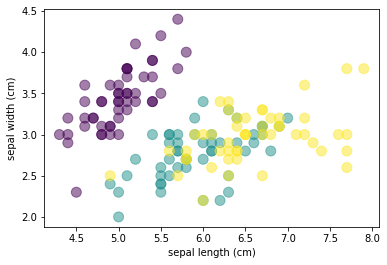

(0, 'sepal length (cm)') (2, 'petal length (cm)')


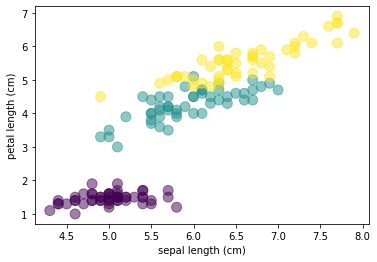

(0, 'sepal length (cm)') (3, 'petal width (cm)')


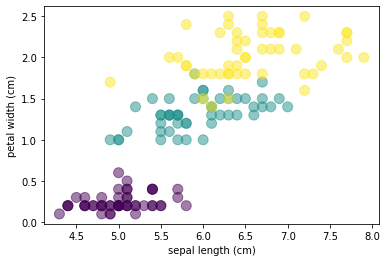

(1, 'sepal width (cm)') (2, 'petal length (cm)')


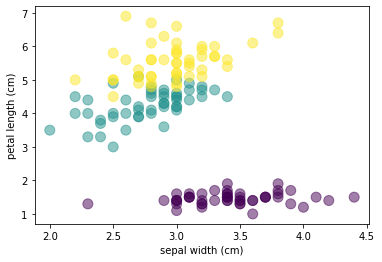

(1, 'sepal width (cm)') (3, 'petal width (cm)')


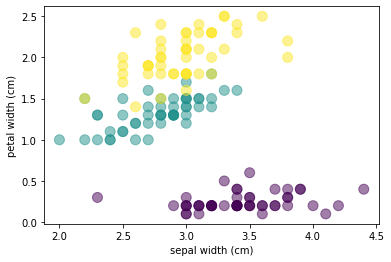

(2, 'petal length (cm)') (3, 'petal width (cm)')


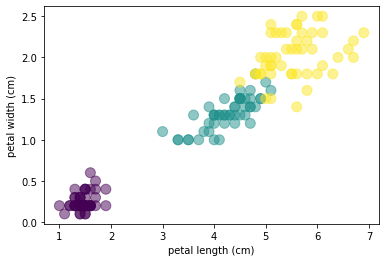

In [33]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print (i,j)
    draw_scatter(iris.data, iris.target, i[0], j[0])

## ML Technique 1: Supervised Learning
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [34]:
### Instantiate K-NN Classifier
# Note: no internal model constructed
# Class is computed from a simple majority vote of the nearest neighbors of each point
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Instantiate Decision Tree classifier
# clf = tree.DecisionTreeClassifier()

In [35]:
clf

KNeighborsClassifier(n_neighbors=1)

In [36]:
print ('feature names : ',iris.feature_names)
# print(iris.data)
print ('label names: ',iris.target_names)
print('labels : ',iris.target)

feature names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
label names:  ['setosa' 'versicolor' 'virginica']
labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Cross-validation and model evaluation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html  
https://scikit-learn.org/stable/modules/model_evaluation.html  

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=123) 

In [43]:
len(iris.data)

150

In [49]:
# K-fold construction
kf = KFold(n_splits=5, shuffle=True, random_state=123) 

accuracy_scores = []
# K-fold cross validation and performance evaluation
for train_index, test_index in kf.split(iris.data):
    # draw_scatter(X_test, x_feature=2, y_feature=3)
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print ('Prediction: ', y_pred)
    print ('Correct:    ', y_test)
    print ('Accuracy:', accuracy_score(y_pred, y_test))
    # print (classification_report(y_test, y_pred, target_names=iris.target_names))
    # draw_confusion_matrix(y_pred,y_test,iris.target_names)
    accuracy_scores.append(accuracy_score(y_pred,y_test))


TRAIN: 120 TEST: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 2 2 2 2 2 2 2 1 2 1 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9
TRAIN: 120 TEST: 30
Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
TRAIN: 120 TEST: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9666666666666667
TRAIN: 120 TEST: 30
Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2]
Accuracy: 1.0
TRAIN: 120 TEST: 30
Prediction:  [0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
Correct:     [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy: 0.9333333333333333


In [50]:
'{:.2f} +/- {:.3f}'.format(np.mean(accuracy_scores), np.std(accuracy_scores))

'0.95 +/- 0.034'

## ML Technique 2: Unsupervised Learning

In [ ]:
# unsupervised k-means 
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(iris.data)
k_means_label = k_means.labels_

### Plot feature combindations + clusters (k = 4)

In [ ]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print(i,j)
    draw_scatter(iris.data, k_means_label, i[0], j[0])

### Unsupervised learning evaluation: elbow plot

In [ ]:
distorsions = []
for k in range(2, 15):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(list(range(2, 15)))
plt.xlabel('K')
_ = plt.ylabel('Intertia')

In [ ]:
# Sources:
# http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/18_IntermediateSklearn
# http://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# http://scikit-learn.org/stable/auto_examples/plot_confusion_matrix.html#example-plot-confusion-matrix-py
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html